<Axes: xlabel='step'>

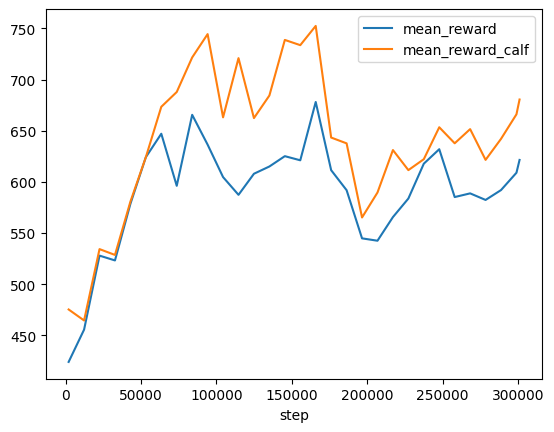

In [39]:
import pandas as pd
import mlflow

from src import run_path


mlflow.set_tracking_uri("file://" + str(run_path) + "/mlruns")

# Get the experiment by name
experiment = mlflow.get_experiment_by_name("eval/cartpole/checkpoints")
runs = mlflow.search_runs(experiment_ids=[experiment.experiment_id])
checkpoint_eval_data = []
for i, run in runs.iterrows():
    checkpoint_eval_data.append({
        "step": int(run["tags.mlflow.runName"].split("_")[-1]),
        "mean_reward": run["metrics.mean_reward"],
    })

checkpoint_eval_data = pd.DataFrame(checkpoint_eval_data).set_index("step")
checkpoint_eval_data.sort_index(inplace=True)

experiment = mlflow.get_experiment_by_name("eval/cartpole/calf")
runs = mlflow.search_runs(experiment_ids=[experiment.experiment_id])
calf_eval_data = []
for i, run in runs.iterrows():
    calf_eval_data.append({
        "step": int(run["tags.mlflow.runName"].split("_")[1]),
        "relax_prob": run["tags.mlflow.runName"].split("_")[-1],
        "mean_reward": run["metrics.mean_reward"],
    })

calf_eval_data = pd.DataFrame(calf_eval_data).groupby("step").agg({"mean_reward": "max"})
calf_eval_data.sort_index(inplace=True)


eval_data = checkpoint_eval_data.join(calf_eval_data, on="step", rsuffix="_calf")
eval_data.sort_index(inplace=True)
eval_data.dropna(inplace=True)
eval_data.plot()

In [38]:
import pandas as pd
import mlflow

from src import run_path


mlflow.set_tracking_uri("file://" + str(run_path) + "/mlruns")

# Get the experiment by name
experiment = mlflow.get_experiment_by_name("eval/pendulum/checkpoints")
runs = mlflow.search_runs(experiment_ids=[experiment.experiment_id])
checkpoint_eval_data = []
for i, run in runs.iterrows():
    checkpoint_eval_data.append({
        "step": int(run["tags.mlflow.runName"].split("_")[-1]),
        "mean_reward": run["metrics.mean_reward"],
    })

checkpoint_eval_data = pd.DataFrame(checkpoint_eval_data).set_index("step")
checkpoint_eval_data.sort_index(inplace=True)

experiment = mlflow.get_experiment_by_name("eval/pendulum/calf")
runs = mlflow.search_runs(experiment_ids=[experiment.experiment_id])
calf_eval_data = []
for i, run in runs.iterrows():
    calf_eval_data.append({
        "step": int(run["tags.mlflow.runName"].split("_")[1]),
        "relax_prob": run["tags.mlflow.runName"].split("_")[-1],
        "mean_reward": run["metrics.mean_reward"],
    })

calf_eval_data = pd.DataFrame(calf_eval_data).groupby("step").agg({"mean_reward": "max"})
calf_eval_data.sort_index(inplace=True)


eval_data = checkpoint_eval_data.join(calf_eval_data, on="step", rsuffix="_calf")
eval_data.sort_index(inplace=True)
eval_data.dropna(inplace=True)
eval_data.plot()

KeyError: "None of ['step'] are in the columns"

In [16]:
calf_eval_data

,median_reward
step,
104448,807.804443
114688,793.586304
12288,415.737915
124928,705.905762
135168,693.797974
145408,789.807556
155648,776.511414
165888,695.065674
176128,737.506836


In [13]:
runs["tags.mlflow.runName"]

0      calf_196608_relax_0.9000
1      calf_258048_relax_1.0000
2       calf_53248_relax_0.9500
3      calf_227328_relax_0.9500
4       calf_83968_relax_1.0000
                 ...           
646     calf_94208_relax_0.1500
647    calf_124928_relax_0.2000
648    calf_268288_relax_0.1500
649     calf_32768_relax_0.0500
650    calf_176128_relax_0.0000
Name: tags.mlflow.runName, Length: 651, dtype: object

In [8]:
runs["tags.mlflow.runName"]

0      checkpoint_286720
1      checkpoint_294912
2      checkpoint_278528
3      checkpoint_253952
4      checkpoint_270336
             ...        
141     checkpoint_26624
142      checkpoint_2048
143     checkpoint_18432
144     checkpoint_34816
145     checkpoint_67584
Name: tags.mlflow.runName, Length: 146, dtype: object